# SEIR Graphs
In this notebook the graphs of the following functions are created.
<ol>
<li> <b>S(t) - </b> number of people that belongs to the Susceptible group </li>
<li> <b>I(t) - </b> number of people that belongs to the Infectious group </li>
<li> <b>E(t) - </b> number of people that belongs to the Exposed group </li>
<li> <b>R(t) - </b> number of people that belongs to the Recovered group </li>
</ol>
Then the histograms of the $M$ value for the nodes with the highest infection potential are created.


Zrobię je dla wierzchołka z największym potencjałęm epidemicznym, potem histogramy ile ludzi te zaraźliwe wierzchołki są w stanie zarazić

In [49]:
#DANE+ BIBLIOTEKI
%store -r G 
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data=open("C:/Users/wojci/Documents/Studia/praca/DANE/dane.txt","r")
data=data.readlines()
contacts=[]
nodes=[]
times=[]
#OBRÓBKA DANYCH
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    nodes.append(int(row[1]))
    nodes.append(int(row[2]))
    times.append(int(row[0])/60/60/24)
nodes=set(nodes)
nodes=list(nodes)  #tak otrzymuję wszystkie wierzchołki jakie są w sieci podczas całego badania

for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    contacts.append((int(row[0])//60/60/24,int(row[1]),int(row[2]))) #i teraz kontakty mamy w postaci (czas, node1,node2)
    

In [50]:
inf_prob=0.006
incubation_period=1
infectious_period=7

def clear_net():
    for i in list(G.nodes):
        G.nodes[i]['state']="S"
        G.nodes[i]['time_of_inf']=False
    G.graph['time']=0
    G.graph['E']=0
    G.graph['S']=92
    G.graph['I']=0
    G.graph['R']=0
    
def new_exposed(node,time):
    G.graph['E']+=1
    G.graph['S']-=1
    G.nodes[node]['state']='E'
    G.nodes[node]['time_of_inf']=time
    
def transformations():
    for i in list(G.nodes):
        #end of incubation
        if G.nodes[i]['state']=="E":
            if G.nodes[i]['time_of_inf']+incubation_period<=G.graph['time']:
                G.nodes[i]['state']="I"
                G.graph['E']-=1
                G.graph['I']+=1
            
        #end of infectiousness ->passing to recovered
        if G.nodes[i]['state']=='I':
            if G.nodes[i]['time_of_inf']+incubation_period+infectious_period<=G.graph['time']:
                G.nodes[i]['state']="R"
                G.nodes[i]['time_of_inf']=False
                G.graph['I']-=1
                G.graph['R']+=1

def new_contact(node1,node2,time):
    
    if G.nodes[node1]['state']=='I'and G.nodes[node2]['state']=='S':
        pr=random.random() 
        if pr<=inf_prob: #udało się zarazić
            G.nodes[node2]['state']='E'
            G.nodes[node2]['time_of_inf']=time
            G.graph['E']+=1
            G.graph['S']-=1
                
    if G.nodes[node2]['state']=='I'and G.nodes[node1]['state']=='S':
        pr=random.random() 
        if pr<=inf_prob: #udało się zarazić
            G.nodes[node1]['state']='E'
            G.nodes[node1]['time_of_inf']=time
            G.graph['E']+=1
            G.graph['S']-=1
            
def epidemics(node):
    S=[]
    E=[]
    I=[]
    R=[]
    clear_net()
    new_exposed(node,0)
    times=[G.graph['time']]
    
    for i in contacts:
        
        if times[-1]!=i[0]:
            G.graph['time']=i[0]
            transformations()
            times.append(G.graph['time'])
            var=True
            
        new_contact(i[1],i[2],i[0])
        
        if var==True:
            S.append(G.graph['S'])
            E.append(G.graph['E'])
            R.append(G.graph['R'])
            I.append(G.graph['I'])
        
            
    return [S,E,I,R]

def simple_epidemics(node): #used for MC simulation
    clear_net()
    new_exposed(node,0)
    for i in contacts:
        G.graph['time']=i[0]
        transformations()
        new_contact(i[1],i[2],i[0])
    return G.graph['S']

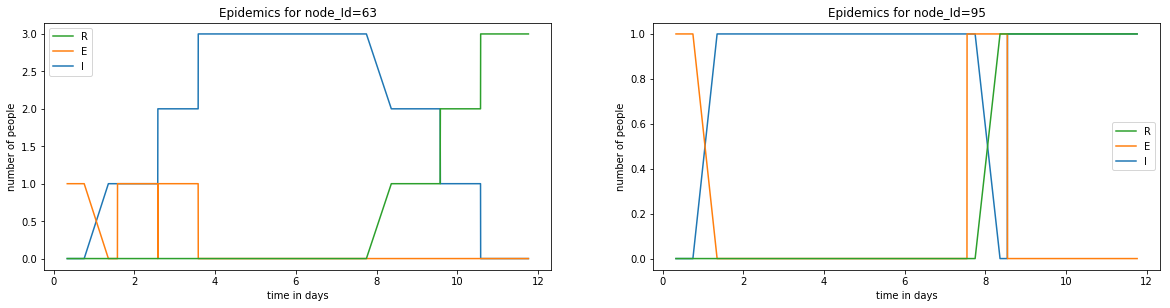

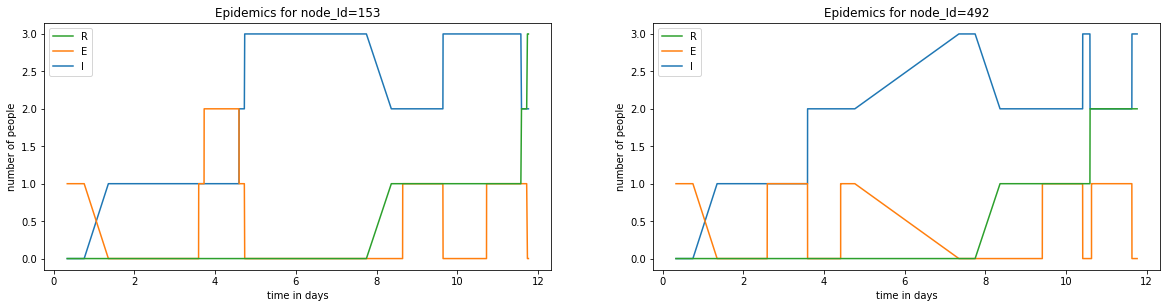

In [51]:
plt.figure(figsize=(20,10)) 

plt.subplot(2,2,1)
[S,E,I,R]=epidemics(63)
I_plot , =plt.plot(times,I,label='I')
E_plot , =plt.plot(times,E,label='E')
R_plot , =plt.plot(times,R,label='R')
plt.xlabel('time in days')
plt.ylabel('number of people')
plt.legend(handles=[R_plot,E_plot,I_plot])
plt.title('Epidemics for node_Id=63')


plt.subplot(2,2,2)
[S,E,I,R]=epidemics(95)
I_plot , =plt.plot(times,I,label='I')
E_plot , =plt.plot(times,E,label='E')
R_plot , =plt.plot(times,R,label='R')
plt.xlabel('time in days')
plt.ylabel('number of people')
plt.title('Epidemics for node_Id=95')

plt.legend(handles=[R_plot,E_plot,I_plot])


plt.figure(figsize=(20,10)) 

plt.subplot(2,2,3)
[S,E,I,R]=epidemics(153)
I_plot , =plt.plot(times,I,label='I')
E_plot , =plt.plot(times,E,label='E')
R_plot , =plt.plot(times,R,label='R')
plt.xlabel('time in days')
plt.ylabel('number of people')
plt.legend(handles=[R_plot,E_plot,I_plot])
plt.title('Epidemics for node_Id=153')

plt.subplot(2,2,4)
[S,E,I,R]=epidemics(492)
I_plot , =plt.plot(times,I,label='I')
E_plot , =plt.plot(times,E,label='E')
R_plot , =plt.plot(times,R,label='R')
plt.xlabel('time in days')
plt.ylabel('number of people')
plt.title('Epidemics for node_Id=492')

plt.legend(handles=[R_plot,E_plot,I_plot])



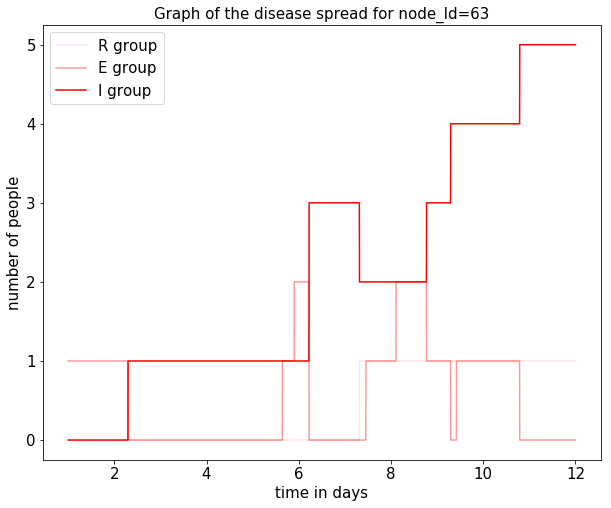

In [56]:
import numpy as np
[S,E,I,R]=epidemics(63)
plt.figure(figsize=[10,8])
f=15
col='red'
x=np.linspace(1.,12, len(I))
I_plot , =plt.plot(x,I,label='I group',color=col,alpha=1)
E_plot , =plt.plot(x,E,label='E group',color=col,alpha=0.4)
R_plot , =plt.plot(x,R,label='R group',color=col,alpha=0.1)
plt.xlabel('time in days',fontsize=f)
plt.ylabel('number of people',fontsize=f)
#xi=np.arange(0, 12, 1.0)
#plt.xticks(xi,x)
plt.legend(handles=[R_plot,E_plot,I_plot],fontsize=f)
plt.title('Graph of the disease spread for node_Id=63',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/not_random/SEIR_graph63_ulepszony.png")
plt.show()

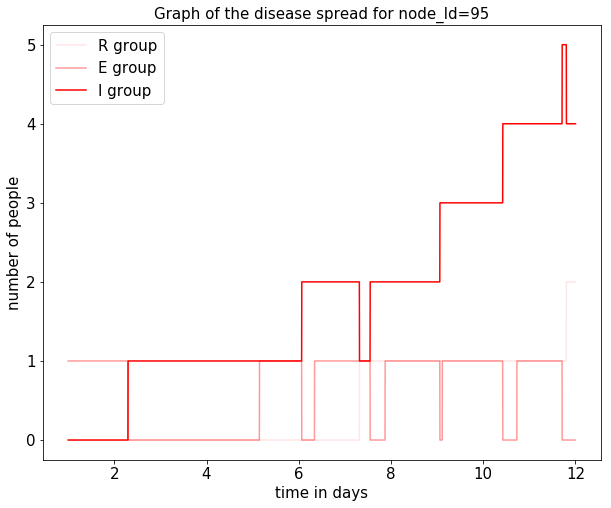

In [58]:
[S,E,I,R]=epidemics(95)
plt.figure(figsize=[10,8])
f=15
x=np.linspace(1.,12, len(I))
I_plot , =plt.plot(x,I,label='I group',color=col, alpha=1)
E_plot , =plt.plot(x,E,label='E group',color=col,alpha=0.4)
R_plot , =plt.plot(x,R,label='R group',color=col,alpha=0.1)
plt.xlabel('time in days',fontsize=f)
plt.ylabel('number of people',fontsize=f)
#xi=np.arange(0, 12, 1.0)
#plt.xticks(xi,x)
plt.legend(handles=[R_plot,E_plot,I_plot],fontsize=f)
plt.title('Graph of the disease spread for node_Id=95',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/not_random/SEIR_graph95_ulepszony.png")
plt.show()

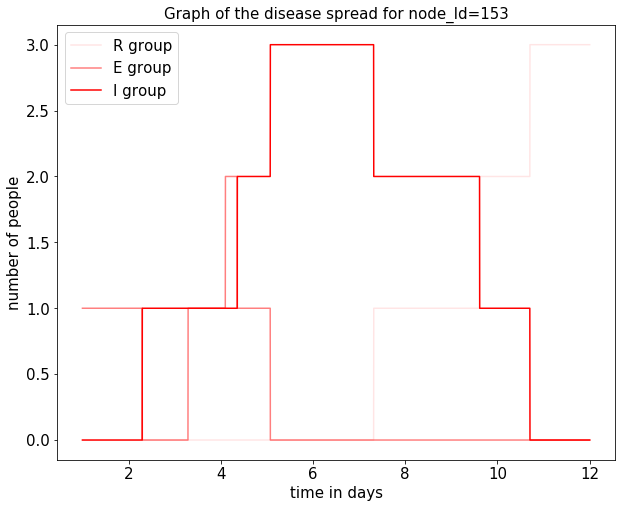

In [60]:
[S,E,I,R]=epidemics(153)
plt.figure(figsize=[10,8])
f=15
x=np.linspace(1.,12, len(I))
I_plot , =plt.plot(x,I,label='I group',color=col,alpha=1)
E_plot , =plt.plot(x,E,label='E group',color=col,alpha=0.5)
R_plot , =plt.plot(x,R,label='R group',color=col,alpha=0.1)
plt.xlabel('time in days',fontsize=f)
plt.ylabel('number of people',fontsize=f)
#xi=np.arange(0, 12, 1.0)
#plt.xticks(xi,x)
plt.legend(handles=[R_plot,E_plot,I_plot],fontsize=f)
plt.title('Graph of the disease spread for node_Id=153',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/not_random/SEIR_graph153_ulepszony.png")
plt.show()

Text(0.5,1,'Epidemics for node_Id=63')

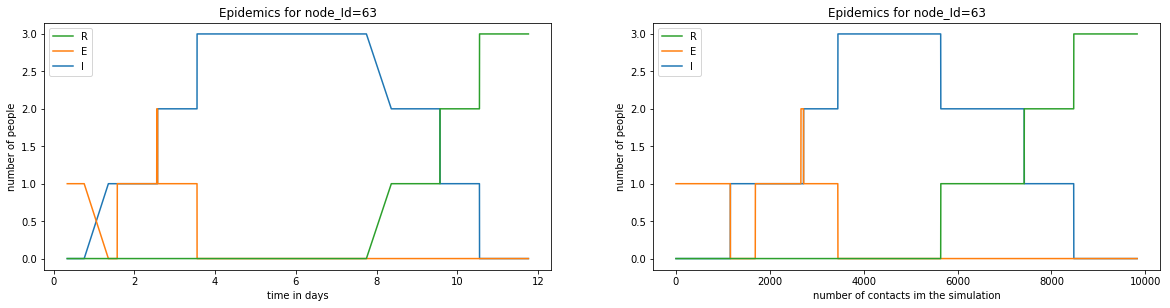

In [47]:
plt.figure(figsize=(20,10)) 

plt.subplot(2,2,1)
[S,E,I,R]=epidemics(63)
I_plot , =plt.plot(times,I,label='I')
E_plot , =plt.plot(times,E,label='E')
R_plot , =plt.plot(times,R,label='R')
plt.xlabel('time in days')
plt.ylabel('number of people')
plt.legend(handles=[R_plot,E_plot,I_plot])
plt.title('Epidemics for node_Id=63')

plt.subplot(2,2,2)
I_plot , =plt.plot(I,label='I')
E_plot , =plt.plot(E,label='E')
R_plot , =plt.plot(R,label='R')
plt.xlabel('number of contacts im the simulation')
plt.ylabel('number of people')
plt.legend(handles=[R_plot,E_plot,I_plot])
plt.title('Epidemics for node_Id=63')


Tu mi chodziło o to, żeby pokazć, że bez czasu to są schodki, a z czasem ze względu na to, że w niektóych momentach nic się nei dzieje trzeba łaćzyć punkty i wychodzą takie krzywe

HISTOGRAMY- ILE LUDZI TE NAJBARDZIEJ ZARAŻLIWE WIERZCHOŁKI SĄ W STANIE ZARAZIĆ

In [5]:
"""n=1000
S_63=[92-simple_epidemics(63) for j in range(0,n)] 
n=1000
S_95=[92-simple_epidemics(95) for j in range(0,n)] 
n=1000
S_123=[92-simple_epidemics(123) for j in range(0,n)]"""
%store -r S_95
#%store -r S_123 #tego nie chę ten nie jest w 3
%store -r S_63


In [7]:
% store -r S_153

Text(0.5,1,'Id=153')

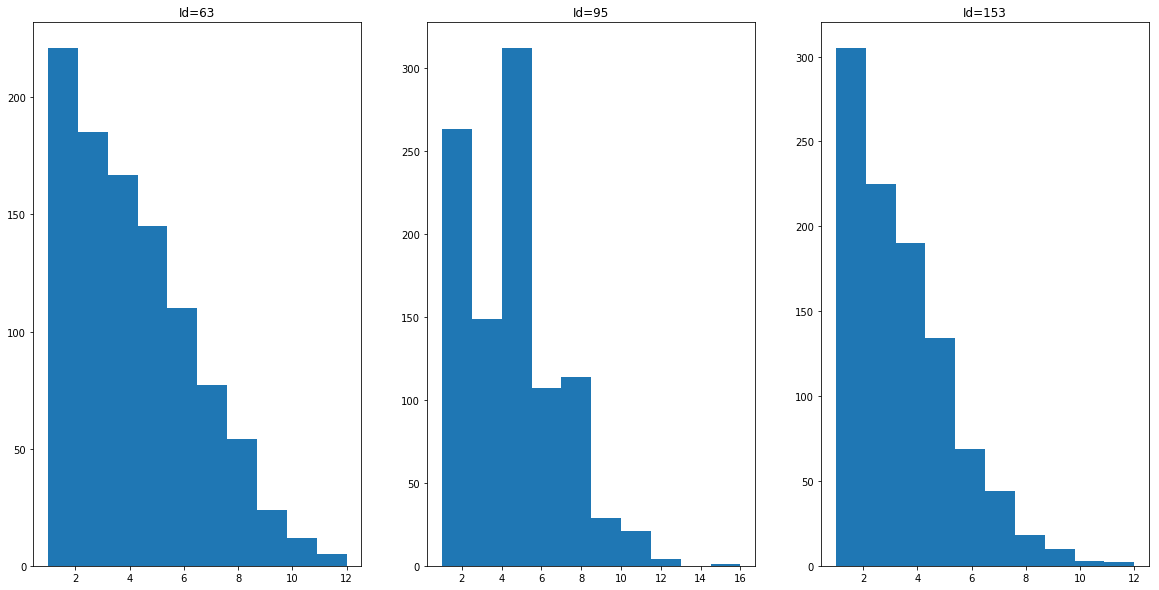

In [8]:
plt.figure(figsize=(20,10)) 
plt.subplot(1,3,1)
plt.hist(S_63)
plt.title('Id=63')
plt.subplot(1,3,2)
plt.hist(S_95)
plt.title('Id=95')
plt.subplot(1,3,3)
plt.hist(S_153)
plt.title('Id=153')


In [2]:
%store -r S_95
#%store -r S_123 #tego nie chę ten nie jest w 3
%store -r S_63
% store -r S_153
import matplotlib.pyplot as plt

Tutaj było po 1000 razy symulowana epidemia zaczynająca się od zadanegow ierzchołka, wzięłam, te któe miały największy potencjał epidemiologiczny i one są nawet w stanie wyprowadzić do 16 osób z grupy S

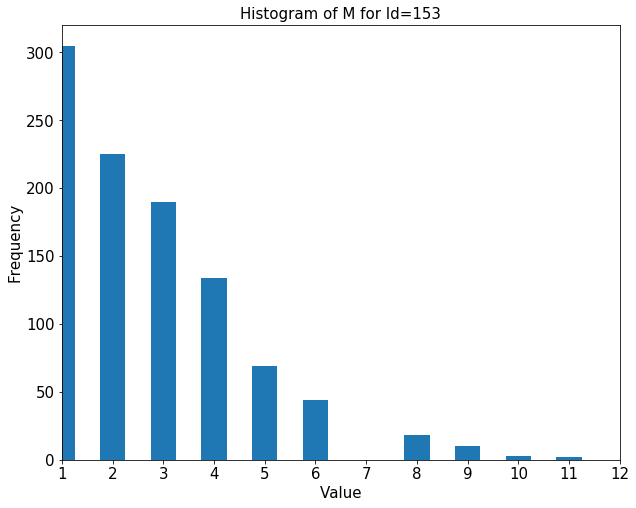

In [14]:
import numpy as np
hist,bin_edges=np.histogram(S_153)
bin_edges = np.round(bin_edges,0)
plt.figure(figsize=[10,8])
plt.bar(bin_edges[:-1], hist,color='#1f77b4', width = 0.5)#,alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
#plt.grid(axis='y', alpha=0.75)
f=15
plt.ylabel('Frequency',fontsize=f)
plt.xlabel('Value',fontsize=f)
plt.title('Histogram of M for Id=153',fontsize=f)
plt.xticks(np.arange(min(S_153), max(S_153)+1, 1.0))
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/not_random/M_histogram153.eps")
plt.show()